# Track oil droplet experiments from 20231121

In [1]:
import os
import glob
import numpy as np
import traceback
import dclab
import dctrack

# supress warning from skimage
import warnings
warnings.filterwarnings(
    "ignore", message="divide by zero encountered in scalar divide")
warnings.filterwarnings(
    "ignore", message="invalid value encountered in scalar divide")
warnings.filterwarnings(
    "ignore", message="Polyfit may be poorly conditioned")

C:\Users\freiche\ownCloud\PhD\Code_general\rtdc_tracking2.0\dctrack\track.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
project_folder = r"..\..\raw_data\20231121_Felix_Si-oil_droplets"
export_folder = r"..\..\tracked_data"

In [4]:
# length of hyperbolic region in um
length_hyper_region = 500
frame_max = None
timeout = None  # 1h 30m

for root, _, _ in os.walk(project_folder):
    if not "tracked_files" in root:
        rtdc_paths = glob.glob(os.path.join(root,"*.rtdc"))
        for file in rtdc_paths:
            print("Analyzing {} \n".format(file))
            # create directory with same structure as Data/RTDC to export data
            file_split = file.split("\\")
            rtdc_idx = file_split.index("RTDC")
            subfolders_export = np.array(file_split)[rtdc_idx+1:-1]
            save_folder = os.path.join(export_folder,"\\".join(subfolders_export))
            if not os.path.isdir(save_folder):
                os.makedirs(save_folder)
            video_folder = os.path.join(save_folder,"Videos")
            if not os.path.isdir(video_folder):
                os.makedirs(video_folder)

            save_path = os.path.join(save_folder, file_split[-1])
            if not os.path.isfile(save_path):
                try:
                    ds = dclab.new_dataset(file)
                    tr_ds = dctrack.track.TrackedDataSet(ds)

                    pix_size = tr_ds.pixel_size
                    tr_ds.tolerance_window = 30

                    tr_ds.channel = True
                    tr_ds.outlet = False
                    if "inlet" in file:
                        tr_ds.inlet = False
                        channel_entry = tr_ds.channel_x_min - 500/pix_size
                        tr_ds.set_channel_values_manual(x_min=0,
                                                        x_max=tr_ds.roi_size_x)
                    else:
                        tr_ds.inlet = True
                        # ROI start 50 um before channel start
                        channel_entry = tr_ds.channel_x_min + 50/pix_size
                        tr_ds.set_channel_values_manual(x_min=0,
                                                        x_max=channel_entry)
                    # start of hyperbolic region in um
                    hyper_start = channel_entry*pix_size + length_hyper_region

                    tr_ds.track(frame_min=0, frame_max=frame_max,
                                timeout=timeout,
                                max_skip_frames=8)
                    tr_ds.time_after_x(hyper_start, return_value=False,
                                       add_to_dataset=True,
                                       variable_name='time_hyper_region')
                    tr_ds.get_ellipse_data(show_progress=False)

                    frame_tracked = tr_ds.dataset['frame'][:][~np.isnan(tr_ds.dataset['object_number'][:])]
                    tr_ds.filter_feature('frame', 0, frame_tracked[-1])

                    export_features = tr_ds.dataset.features_scalar
                    if 'inert_ratio_raw' not in export_features:
                        export_features += ['inert_ratio_raw', 'inert_ratio_cvx', 'inert_ratio_prnc']
                    tr_ds.export_tracked_dataset_as_hdf5(path=save_path,
                                                         features=export_features,
                                                         filtered=True,
                                                         override=True,
                                                         compression=None,
                                                         skip_checks=True)

                    video_path = os.path.join(video_folder, os.path.splitext(file_split[-1])[0]+".avi")
                    tr_ds.write_video(save_path=video_path, first_frame=1000, last_frame=3000,
                                      draw_zones=True)
                except:
                    print("An error occured. See below \n")
                    print(traceback.print_exc())

Analyzing Y:\Data\RTDC\20231121_Felix_Si-oil_droplets\1000cSt\hyper\M001_data.rtdc 


Tracking in progress:   0%|          | 0/15653 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/243 [00:00<?, ?it/s]

C:\Users\freiche\ownCloud\PhD\Code_general\rtdc_tracking2.0\dctrack\video.py:118: RuntimeWarning: invalid value encountered in cast
  zone_starts = np.array(dataset['prediction_zone_start']
C:\Users\freiche\ownCloud\PhD\Code_general\rtdc_tracking2.0\dctrack\video.py:120: RuntimeWarning: invalid value encountered in cast
  zone_ends = np.array(dataset['prediction_zone_end']


Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231121_Felix_Si-oil_droplets\1000cSt\hyper\M002_data.rtdc 


Tracking in progress:   0%|          | 0/39762 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/711 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231121_Felix_Si-oil_droplets\1000cSt\hyper\M003_data.rtdc 


Tracking in progress:   0%|          | 0/28355 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/421 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231121_Felix_Si-oil_droplets\1000cSt\inlet\M001_data.rtdc 


Tracking in progress:   0%|          | 0/1939 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/155 [00:00<?, ?it/s]

C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\dclab\rtdc_dataset\writer.py:569: RuntimeWarning: All-NaN axis encountered
  val = ufunc(dset)
C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\dclab\rtdc_dataset\writer.py:579: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(dset)


Writing video:   0%|          | 0/939 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231121_Felix_Si-oil_droplets\500cSt\hyper\M001_data.rtdc 


Tracking in progress:   0%|          | 0/9578 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/143 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231121_Felix_Si-oil_droplets\500cSt\hyper\M002_data.rtdc 


Tracking in progress:   0%|          | 0/5230 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/55 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231121_Felix_Si-oil_droplets\500cSt\hyper\M003_data.rtdc 


Tracking in progress:   0%|          | 0/4690 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/74 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231121_Felix_Si-oil_droplets\500cSt\hyper\M004_data.rtdc 


Tracking in progress:   0%|          | 0/21149 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/354 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231121_Felix_Si-oil_droplets\500cSt\inlet\M001_data.rtdc 


Tracking in progress:   0%|          | 0/1476 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/126 [00:00<?, ?it/s]

Writing video:   0%|          | 0/476 [00:00<?, ?it/s]

## Summarize results

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
from tqdm.notebook import tqdm
from scripts.extensional_paras import (fit_velocity,
                                       extension_rate_from_velocity_poly,
                                       recalculate_time)

In [6]:
# for some reason need to re-register the ellipse features
ell_features = ['ell_cx', 'ell_cy', 'ell_major', 'ell_minor', 'ell_angle']
for ell_feat in ell_features:
    if not dclab.definitions.feature_exists(ell_feat):
        dclab.register_temporary_feature(feature=ell_feat)

In [7]:
def compute_extensional_paras(tr_ds,
                              hyper_start=None, hyper_end=None,
                              stable_region_start=None,
                              filter=False, **filter_kws):
    """
    :param tr_ds: tracked_dataset instance of dctrack
    :return: df: dataframe with additional analysis parameters
    """
    if filter:
        tr_ds.filter_obj_distance = True
        tr_ds.filter_obj_n_events = True
        tr_ds.filter_backward_movement = True
        tr_ds.filter(inplace=True, return_filtered_ds=False, **filter_kws)

    df = tr_ds.get_extensional_paras_dataframe(hyper_start=hyper_start,
                                               hyper_end=hyper_end,
                                               stable_extension_start=stable_region_start
                                               )
    return df

def get_folder_data(folder):
    # print("Analyzing ", folder)
    files = glob.glob(os.path.join(folder, "*.rtdc"))

    df_folder = pd.DataFrame()

    for file in tqdm(files):
        tr_ds = dctrack.track.TrackedDataSet(file)
        flow_rate = np.round(tr_ds.dataset.config['setup']['flow rate'], 2)
        # hyperbola start 500 um before channel
        hyper_start = tr_ds.channel_x_max * tr_ds.pixel_size + 500
        # stable region 150 µm in the hyperbola
        # (flow right to left -> negative sign)
        stable_region_start = hyper_start - 150

        df = compute_extensional_paras(tr_ds,
                                       hyper_start=hyper_start,
                                       stable_region_start=stable_region_start,
                                       filter=True,
                                       max_back_movement=0,
                                       min_events=5)

        # only use data in linear regime for fitting
        df_filtered = df[(150 < df['x_hyper']) & (df['x_hyper'] < 450)]
        x_fit = np.array(df_filtered['x_hyper']) *1e-6 #  in m
        y_fit = np.array(df_filtered['velocity'])
        idx = np.isfinite(x_fit) & np.isfinite(y_fit)
        p, cov = np.polyfit(x_fit[idx], y_fit[idx], 1, cov=True)
        fit_errs = np.sqrt(np.diag(cov))

        df['extension_rate_sample'] = abs(p[0])
        df['extension_rate_sample_err'] = fit_errs[0]
        df['flow_rate'] = flow_rate

        roi_size_x = tr_ds.dataset.config['imaging']['roi size x']
        pix_size = tr_ds.dataset.config['imaging']['pixel size']
        df['pos_x_center'] = df['pos_x'] - roi_size_x * pix_size / 2
        
        df['run_idx'] = tr_ds.dataset.config['experiment']['run index']
        df['diameter'] = 2 * np.sqrt(pix_size**2 * df['ell_major'] * df['ell_minor'])
        
        df_folder = pd.concat([df_folder, df])

    return df_folder

def df_fit_values(df_in, x_feature='x_shift', time_label='time_shift', poly_degree=12, x_0=-60,
                  pixel_size=0.68, viscosity=0.1):
    df_out = pd.DataFrame()
    flow_rates = df_in['flow_rate'].unique()
    run_idxx = df_in['run_idx'].unique()
    pbar = tqdm(flow_rates, desc="Iterating over flow_rates")
    for fr in pbar:
        for ridx in run_idxx:
            df = df_in.loc[(df_in['flow_rate'] == fr) & 
                           (df_in['run_idx'] == ridx)]
            if len(df) > 0:
                df['x_shift'] = df['x_hyper'] - x_0
                x = df[x_feature]
                velocity_poly = fit_velocity(df, x_feature=x_feature, degree=poly_degree)
                df['velocity_fit'] = velocity_poly(x)
                er = extension_rate_from_velocity_poly(x, velocity_poly)
                df['extension_rate_fit'] = er
                df = recalculate_time(df, velocity_poly,
                                      x_feature=x_feature,
                                      time_label=time_label)
                # repeat time calculation for x_hyper -> time_hyper
                velocity_poly = fit_velocity(df, x_feature='x_hyper', degree=poly_degree)
                df = recalculate_time(df, velocity_poly,
                                      x_feature='x_hyper',
                                      time_label='time_hyper')
                df_out = pd.concat([df_out, df])

    df_out['normal_stress']  = 4 * viscosity * df_out['extension_rate_fit']

    return df_out

def get_df_strain_features(df_in):
    df_in['strain_inert'] = df_in['inert_ratio_raw'] - 1
    # net tensile strain based on inertia ratio assuming shape is an ellipse
    df_in['net_strain_inert'] = ((df_in['inert_ratio_raw'] - 1) 
                                 / np.sqrt(df_in['inert_ratio_raw']))
    # strain features based on principal inertia ratio
    df_in['strain_inert_prnc'] = df_in['inert_ratio_prnc'] - 1
    # net tensile strain based on inertia ratio assuming shape is an ellipse
    df_in['net_strain_inert_prnc'] = ((df_in['inert_ratio_prnc'] - 1) 
                                      / np.sqrt(df_in['inert_ratio_prnc']))
    # ellipse features
    df_in['net_strain_ell'] = ((df_in['ell_major'] - df_in['ell_minor']) 
                               / np.sqrt(df_in['ell_major'] * df_in['ell_minor']))
    df_in['taylor_strain_ell'] = ((df_in['ell_major'] - df_in['ell_minor']) 
                                  / (df_in['ell_major'] + df_in['ell_minor']))
    return df_in

In [8]:
project_folder = r"T:\Members\Felix\analysis_data\RTDC\20231121_Felix_Si-oil_droplets"
# only use data from third try
folder_names = [ff for ff in os.listdir(project_folder) 
                if os.path.isdir(os.path.join(project_folder, ff))]

In [9]:
data_exports = r"..\data_exports"

In [10]:
data_folder = os.path.join(data_exports, "20231121_Si-oil_droplets", "exports_20231121")
if not os.path.isdir(data_folder):
    os.makedirs(data_folder)

##### Create and save one dataframe for all hyper data from 20231121
Need to create individual files for each sample because loop breaks often.

In [11]:
x0 = -60

In [12]:
for folder in tqdm(folder_names):
    print("Analyzing: ", folder)
    save_path = os.path.join(data_folder, folder + "_hyper.tsv")

    # if not os.path.isfile(save_path):
    data_dir = os.path.join(project_folder, folder, "hyper")
    df_cc = get_folder_data(data_dir)

    df_cc = df_fit_values(df_cc.loc[df_cc['x_hyper'] < 530], x_0=x0)
    df_cc['sample'] = folder

    df_cc.to_csv(save_path, sep='\t')

  0%|          | 0/2 [00:00<?, ?it/s]

Analyzing:  1000cSt


  0%|          | 0/3 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\freiche\AppData\Local\Temp\ipykernel_29892\2433660625.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_shift'] = df['x_hyper'] - x_0
C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\freiche\AppData\Local\Temp\ipykernel_29892\2433660625.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['velocity_fit'] = velocity_poly(x)
C:\Us

Analyzing:  500cSt


  0%|          | 0/4 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\freiche\AppData\Local\Temp\ipykernel_29892\2433660625.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_shift'] = df['x_hyper'] - x_0
C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\freiche\AppData\Local\Temp\ipykernel_29892\2433660625.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['velocity_fit'] = velocity_poly(x)
C:\Us

In [13]:
df_20231121 = pd.DataFrame()
files_20231121 = glob.glob(os.path.join(data_folder, "*hyper.tsv"))
for file in tqdm(files_20231121):
    df_cc = pd.read_csv(os.path.join(data_folder, file), sep='\t', index_col=0)
    df_20231121 = pd.concat([df_20231121, df_cc], ignore_index=True)

  0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
df_20231121['date'] = '20231121'
df_20231121['wc'] = 60
df_20231121 = get_df_strain_features(df_20231121)

In [15]:
filename = "20231121_oil_droplets_hyper.tsv"
df_20231121.to_csv(os.path.join(data_exports, "20231121_Si-oil_droplets", filename),
                   sep='\t')
print("Done")

Done


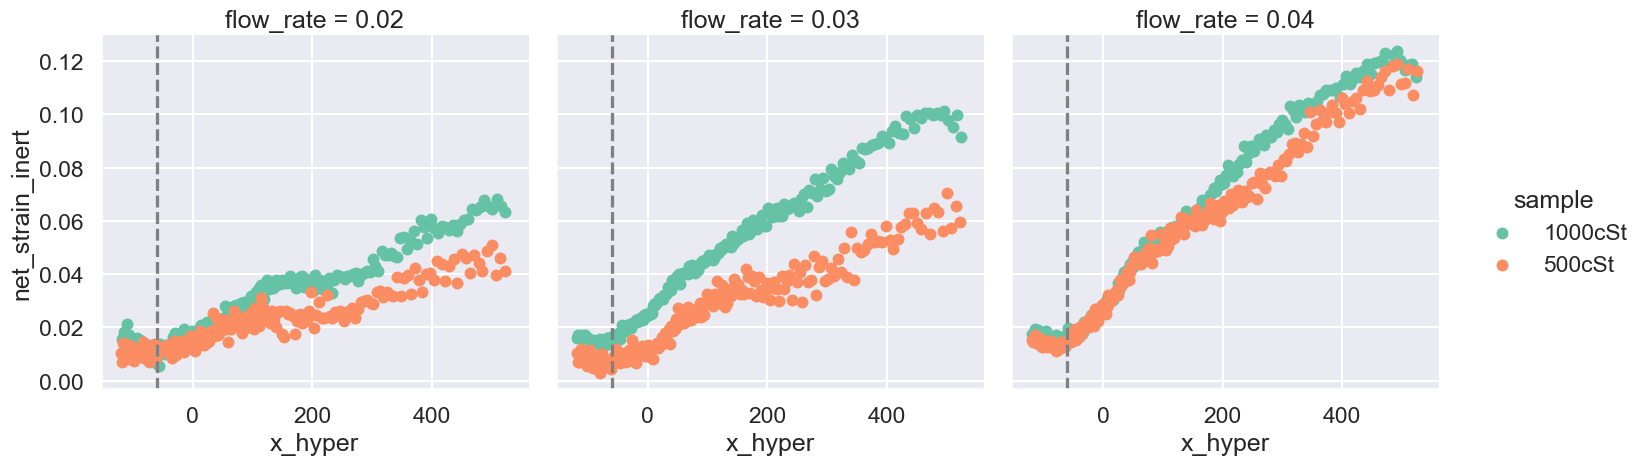

In [16]:
g = sns.lmplot(data=df_20231121,
               x='x_hyper', y='net_strain_inert', hue='sample', palette='Set2',
               col='flow_rate',  #col_wrap=5,
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True, 
                          # 'legend_out': False
                          }
               )
g.refline(x=x0, markersize=0)
plt.show()

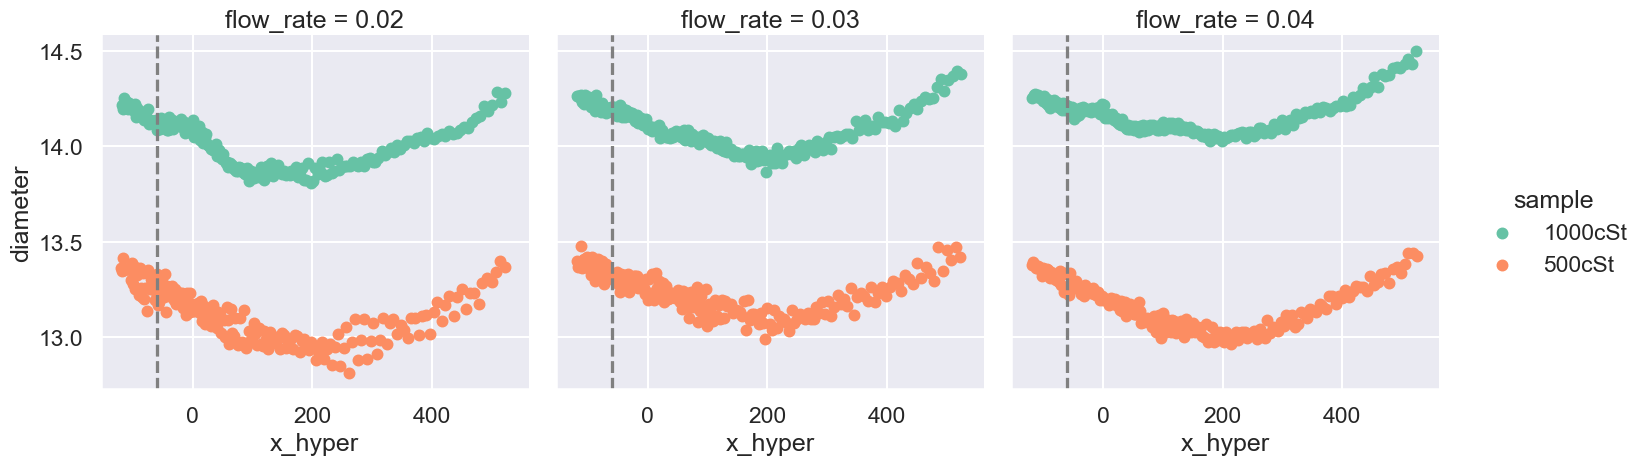

In [38]:
g = sns.lmplot(data=df_20231121,
               x='x_hyper', y='diameter', hue='sample', palette='Set2',
               col='flow_rate',  #col_wrap=5,
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True,
                          # 'legend_out': False
                          }
               )
g.refline(x=x0, markersize=0)
plt.show()

In [43]:
g = sns.lmplot(data=df_20231121,
               x='x_hyper', y='net_strain_inert', hue='run_idx', palette='Set2',
               row='sample',
               col='flow_rate',  #col_wrap=5,
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True,
                          # 'legend_out': False
                          }
               )
g.refline(x=x0, markersize=0)
plt.show()

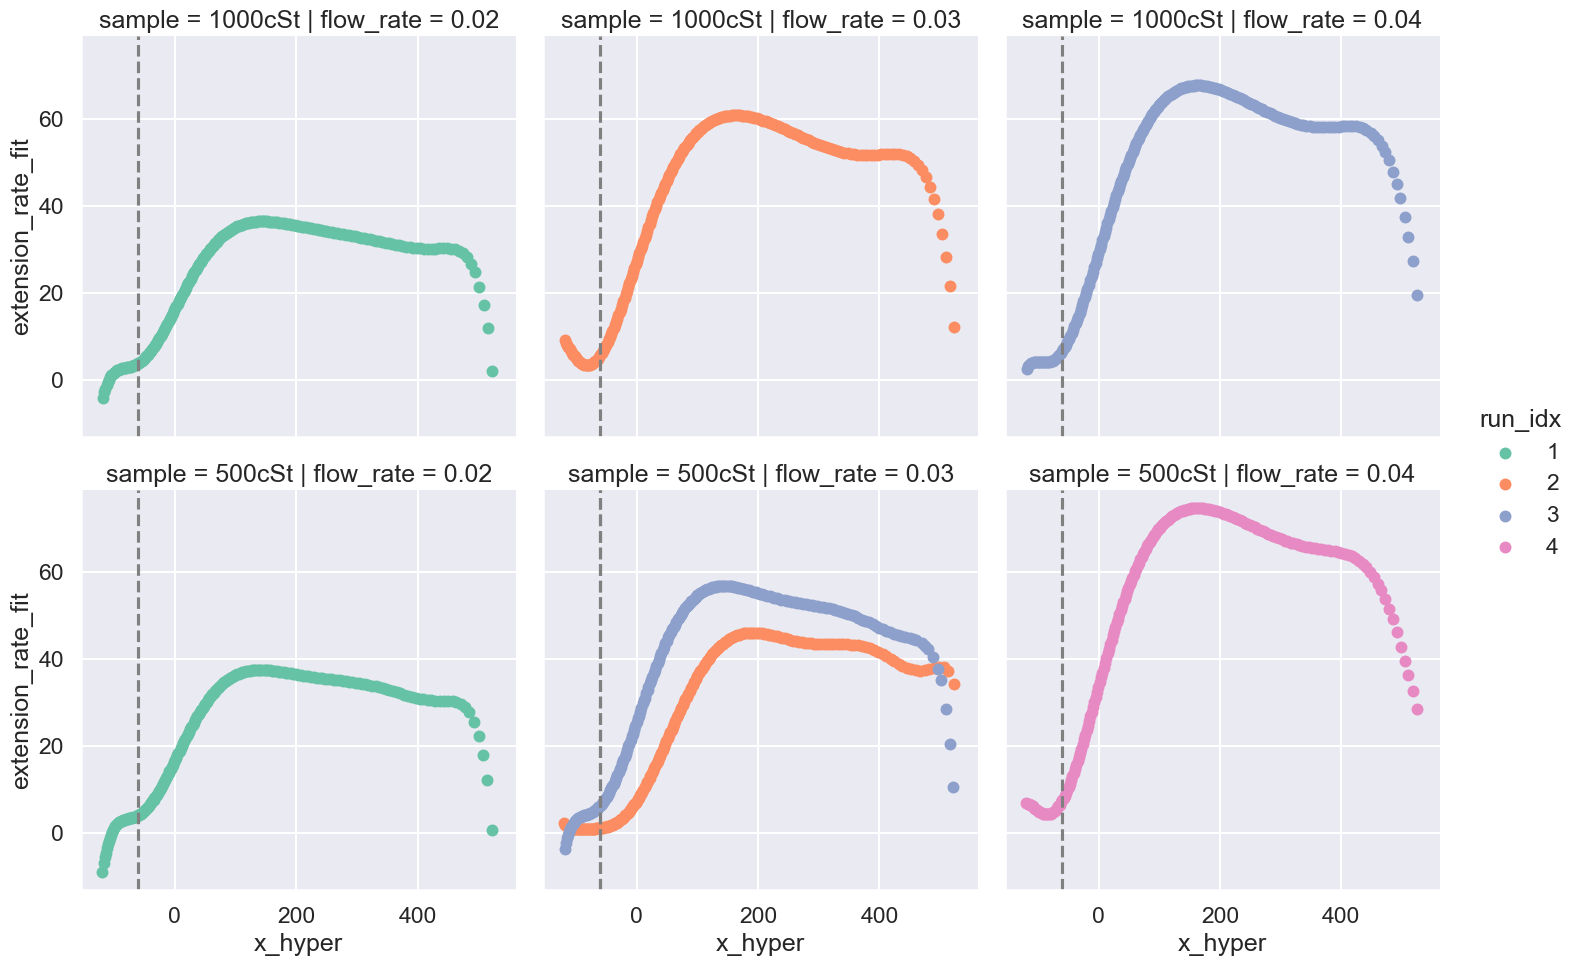

In [40]:
g = sns.lmplot(data=df_20231121,
               x='x_hyper', y='extension_rate_fit', hue='run_idx', palette='Set2',
               row='sample',
               col='flow_rate',  #col_wrap=5,
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True,
                          # 'legend_out': False
                          }
               )
g.refline(x=x0, markersize=0)
plt.show()

In [19]:
df_20231121

area_msd  area_ratio    area_um    aspect  bright_avg  bright_sd  \
0          365.0    1.026027  173.16881  1.045454  124.413100  13.698650   
1          361.5    1.016598  169.93200  1.000000  124.033080  13.514536   
2          364.0    1.016484  171.08801  1.000000  124.510100  13.823651   
3          361.5    1.015214  169.70080  1.000000  124.366410  13.180798   
4          366.0    1.025956  173.63121  1.045454  124.854270  13.539218   
...          ...         ...        ...       ...         ...        ...   
125241     298.0    1.025168  141.26320  1.157895  115.324160  12.094637   
125242     300.0    1.025000  142.18800  1.050000  115.465040  11.372105   
125243     301.0    1.026578  142.88160  1.050000  115.015150  11.525850   
125244     300.0    1.026667  142.41920  1.050000  114.148930  11.495698   
125245     299.0    1.015050  140.33841  1.105263  113.131096  10.764010   

            circ    deform  ell_angle      ell_cx  ...  normal_stress  \
0       0.990684  0.009316   3.043837  792.295161  ...       7.729076   
1       0.988733  0.011267   2.728337  784.441506  ...       8.299167   
2       0.988586  0.011414   2.673348  776.575636  ...       8.856376   
3       0.988918  0.011082   2.796112  768.404448  ...       9.416474   
4       0.992085  0.007915   2.918258  759.960277  ...       9.968696   
...          ...       ...        ...         ...  ...            ...   
125241  0.987352  0.012648   0.317144  165.434228  ...      24.675642   
125242  0.990579  0.009421   0.415637  138.104801  ...      23.349623   
125243  0.989402  0.010598   0.385255  110.090723  ...      21.119658   
125244  0.985303  0.014697   0.352505   81.246421  ...      17.814280   
125245  0.983162  0.016838   0.328095   52.007250  ...      13.720270   

         sample      date  wc  strain_inert  net_strain_inert  \
0       1000cSt  20231121  60      0.016995          0.016852   
1       1000cSt  20231121  60      0.012432          0.012355   
2       1000cSt  20231121  60      0.014156          0.014057   
3       1000cSt  20231121  60      0.016850          0.016710   
4       1000cSt  20231121  60      0.034852          0.034260   
...         ...       ...  ..           ...               ...   
125241   500cSt  20231121  60      0.104345          0.099293   
125242   500cSt  20231121  60      0.079486          0.076503   
125243   500cSt  20231121  60      0.083139          0.079885   
125244   500cSt  20231121  60      0.101650          0.096847   
125245   500cSt  20231121  60      0.109394          0.103860   

        strain_inert_prnc  net_strain_inert_prnc  net_strain_ell  \
0                0.017097               0.016953        0.017668   
1                0.017855               0.017697        0.017812   
2                0.023796               0.023518        0.022221   
3                0.021551               0.021323        0.020740   
4                0.039500               0.038743        0.038528   
...                   ...                    ...             ...   
125241           0.132704               0.124689        0.125952   
125242           0.118959               0.112458        0.111980   
125243           0.117320               0.110990        0.109316   
125244           0.137387               0.128822        0.126835   
125245           0.141494               0.132435        0.131731   

        taylor_strain_ell  
0                0.008834  
1                0.008906  
2                0.011110  
3                0.010370  
4                0.019261  
...                   ...  
125241           0.062852  
125242           0.055902  
125243           0.054576  
125244           0.063290  
125245           0.065723  

[125246 rows x 66 columns]

### Summarize inlet data

In [26]:
def get_folder_data_inlet(folder):
    # print("Analyzing ", folder)
    files = glob.glob(os.path.join(folder, "*.rtdc"))

    df_folder = pd.DataFrame()

    for file in tqdm(files):
        tr_ds = dctrack.track.TrackedDataSet(file)
        flow_rate = np.round(tr_ds.dataset.config['setup']['flow rate'], 3)
        # hyperbola start 500 um before channel
        hyper_start = tr_ds.channel_x_min * tr_ds.pixel_size - 500

        df = compute_extensional_paras(tr_ds,
                                       hyper_start=hyper_start,
                                       filter=True,
                                       max_back_movement=0,
                                       min_events=5)
        df['flow_rate'] = flow_rate
        roi_size_x = tr_ds.dataset.config['imaging']['roi size x']
        pix_size = tr_ds.dataset.config['imaging']['pixel size']
        df['pos_x_center'] = df['pos_x'] - roi_size_x * pix_size / 2
        
        # print(tr_ds.dataset.config['experiment']['run index'])
        df['run_idx'] = tr_ds.dataset.config['experiment']['run index']
        
        df_folder = pd.concat([df_folder, df])

    return df_folder

In [32]:
for folder in tqdm(folder_names):
    save_path = os.path.join(data_folder, folder + "_inlet.tsv")
    
    # if not os.path.isfile(save_path):
    data_dir = os.path.join(project_folder, folder, "inlet")
    df_cc = get_folder_data_inlet(data_dir)
    df_cc = df_fit_values(df_cc, x_0=x0)
    df_cc['sample'] = folder
    df_cc.to_csv(save_path, sep='\t')

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


  0%|          | 0/1 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


In [33]:
df_20231121_inlet = pd.DataFrame()
files_20231121_inlet = glob.glob(os.path.join(data_folder, "*inlet.tsv"))
for file in tqdm(files_20231121_inlet):
    df_cc = pd.read_csv(os.path.join(data_folder, file), sep='\t', index_col=0)
    df_20231121_inlet = pd.concat([df_20231121_inlet, df_cc], ignore_index=True)

  0%|          | 0/2 [00:00<?, ?it/s]

In [34]:
df_20231121_inlet['date'] = '20231121'
df_20231121_inlet['wc'] = 60
df_20231121_inlet = get_df_strain_features(df_20231121_inlet)

In [35]:
g = sns.lmplot(data=df_20231121_inlet,
               x='pos_x', y='net_strain_inert',
               hue='sample', palette='Set2',
               x_bins=100, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True, 'legend_out': False})
# g.refline(x=x0, markersize=0)
plt.show()

In [36]:
filename = "20231121_oil_droplets_inlet.tsv"
df_20231121_inlet.to_csv(os.path.join(data_exports, "20231121_Si-oil_droplets", filename),
                         sep='\t')
print("Done")

Done
